In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [35]:
import os
import matplotlib.pyplot as plt

base_dir = '/content/gdrive/MyDrive/FacialAgingProject/DATASET/'
classes = ['dark spots', 'puffy eyes', 'wrinkles', 'clear skin']
class_counts = {}

for class_name in classes:
    class_path = os.path.join(base_dir, class_name)
    count = len(os.listdir(class_path))
    class_counts[class_name] = count
    print(f"Class '{class_name}': {count} images")



Class 'dark spots': 300 images
Class 'puffy eyes': 300 images
Class 'wrinkles': 300 images
Class 'clear skin': 300 images


In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from google.colab import drive

In [37]:
data_dir = '/content/gdrive/MyDrive/FacialAgingProject/DATASET/'
classes = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
IMG_SIZE = 224
RANDOM_STATE = 42

In [38]:

def load_images(data_dir, classes):
    """Loads images, resizes, and converts BGR to RGB."""
    data = []
    labels = []

    print("Starting image loading and resizing...")
    for idx, label in enumerate(classes):
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"ERROR: Path not found: {path}")
            continue

        print(f"Processing class: {label}")
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

                data.append(img.astype('float32'))
                labels.append(idx)
            else: print(f"Warning: Could not read image {img_name}")

    return np.array(data), np.array(labels)

In [39]:
X, y = load_images(data_dir, classes)
X, y = shuffle(X, y, random_state=RANDOM_STATE)

y_encoded = to_categorical(y, num_classes=len(classes))

print(f"Images (X) shape: {X.shape} (Range [0, 255])")
print(f"Labels (y_encoded) shape: {y_encoded.shape} (One-Hot Encoded)")

Starting image loading and resizing...
Processing class: wrinkles
Processing class: dark spots
Processing class: puffy eyes
Processing class: clear skin
Images (X) shape: (1200, 224, 224, 3) (Range [0, 255])
Labels (y_encoded) shape: (1200, 4) (One-Hot Encoded)


/tmp/ipython-input-1757357827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=label_names, palette="viridis")


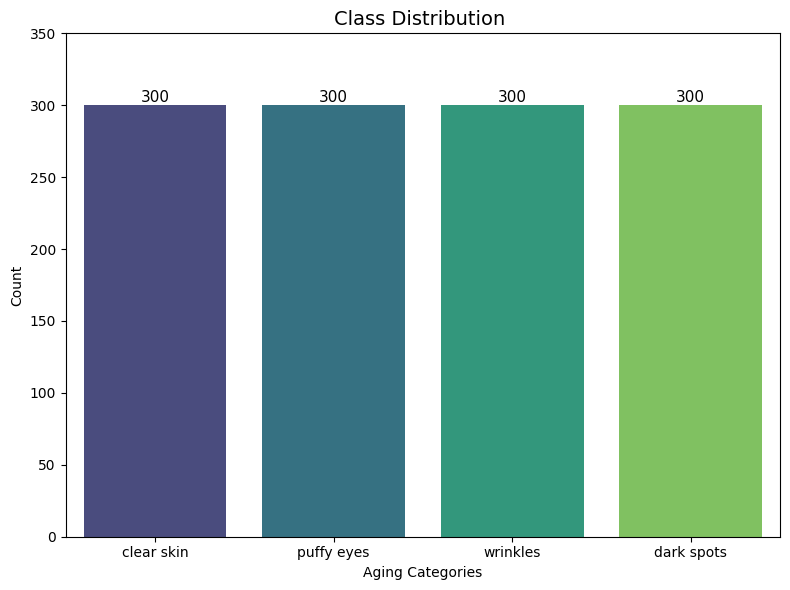

In [40]:
label_names = [classes[i] for i in y]

plt.figure(figsize=(8, 6))
bars = sns.countplot(x=label_names, palette="viridis")
plt.title("Class Distribution ", fontsize=14)
plt.xlabel("Aging Categories")
plt.ylabel("Count")
plt.ylim(0, 350)

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.savefig('/content/gdrive/MyDrive/FacialAgingProject/class_distribution_plot.png')
plt.show()


 Augmentation
Displaying 5 augmented versions of a sample image:


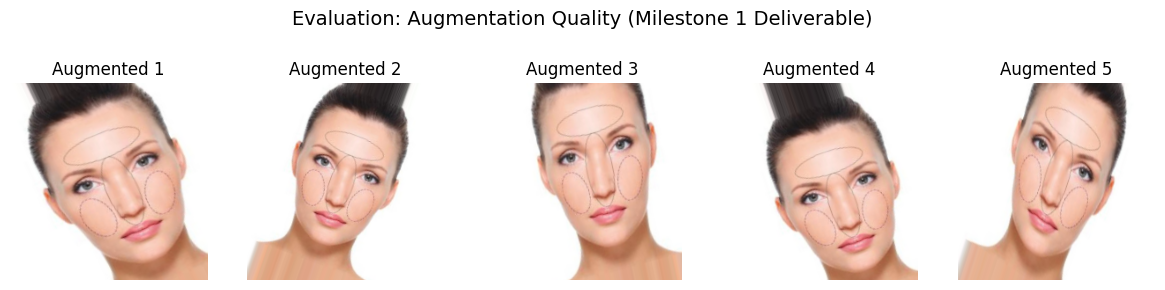

In [41]:

print("\n Augmentation")
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

sample_img = X[0].reshape((1,) + X[0].shape)
i = 0
plt.figure(figsize=(12, 3))
print("Displaying 5 augmented versions of a sample image:")

for batch in datagen.flow(sample_img, batch_size=1):
    plt.subplot(1, 5, i + 1)
    plt.imshow(batch[0] / 255.0)
    plt.title(f"Augmented {i+1}")
    plt.axis('off')
    i += 1
    if i >= 5:
        break

plt.suptitle("Evaluation: Augmentation Quality (Milestone 1 Deliverable)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('/content/gdrive/MyDrive/FacialAgingProject/augmentation_visualization.png')
plt.show()

In [42]:
output_dir = '/content/gdrive/MyDrive/FacialAgingProject/'
np.save(os.path.join(output_dir, 'X_data_224_rgb.npy'), X)
np.save(os.path.join(output_dir, 'y_labels_one_hot.npy'), y_encoded)

print(f"Final preprocessed data saved to: {output_dir}")

Final preprocessed data saved to: /content/gdrive/MyDrive/FacialAgingProject/
